In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
##Read Data

In [2]:
data=pd.read_csv("segmm_product_classification.csv")
data.head()


,Unnamed: 0,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,run_class
0,208830,128,128,16,8,32,16,32,8,8,1,1,1,1,0,0
1,109564,64,64,32,32,8,32,16,2,2,4,1,1,0,0,0
2,185445,128,64,32,8,16,8,16,8,2,2,0,1,0,1,0
3,52683,32,128,16,16,8,16,16,8,2,4,1,0,1,1,0
4,152392,128,32,16,8,16,16,8,2,2,1,1,0,0,0,0


In [3]:
y=np.array(data["run_class"])
features=data.iloc[:,1:15].columns
X=np.array(data.iloc[:,1:15])
features

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB'],
      dtype='object')

In [4]:
#Train/Test split
from sklearn.model_selection import train_test_split

X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


X_train, X_val, y_train, y_val = train_test_split(X_train_80, y_train_80, test_size=0.2, random_state=1)

In [ ]:
##Decision Tree

In [5]:
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, y_train, max_depth=5): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100
            ,max_depth = max_depth, min_samples_leaf  = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy

# Function to perform training with entropy. 
def tarin_using_gini(X_train, y_train, max_depth=5): 
  
    # Decision tree with entropy 
    clf_gini = DecisionTreeClassifier( 
            criterion = "gini", random_state = 100
            ,max_depth = max_depth, min_samples_leaf  = 5,splitter='best') 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini

# Function to make predictions 
def prediction(X, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

# Function to calculate accuracy 
def cal_accuracy(y_true, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_true, y_pred)) 
    
    accuracy=accuracy_score(y_true,y_pred)*100
    print ("Accuracy : ", accuracy) 
      
    print("Report : ", 
    classification_report(y_true, y_pred)) 
    return accuracy

#function to compute average error    
def compute_error(y_true, y_pred): 
    
    error_sum=0
    for i in range(len(y_true)):
        if y_true[i]!=y_pred[i]:
            error_sum+=1
    error= (1/len(y_true))*error_sum
    return error    

In [ ]:
#Test Run for default values

In [74]:
clf_entropy = tarin_using_entropy(X_train_80, y_train_80)  

print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[0 0 1 ... 0 1 0]
Confusion Matrix:  [[34495  1182]
 [ 3858  8785]]
Accuracy :  89.56953642384106
Report :                precision    recall  f1-score   support

           0       0.90      0.97      0.93     35677
           1       0.88      0.69      0.78     12643

    accuracy                           0.90     48320
   macro avg       0.89      0.83      0.85     48320
weighted avg       0.89      0.90      0.89     48320



In [ ]:
#Plot the tree

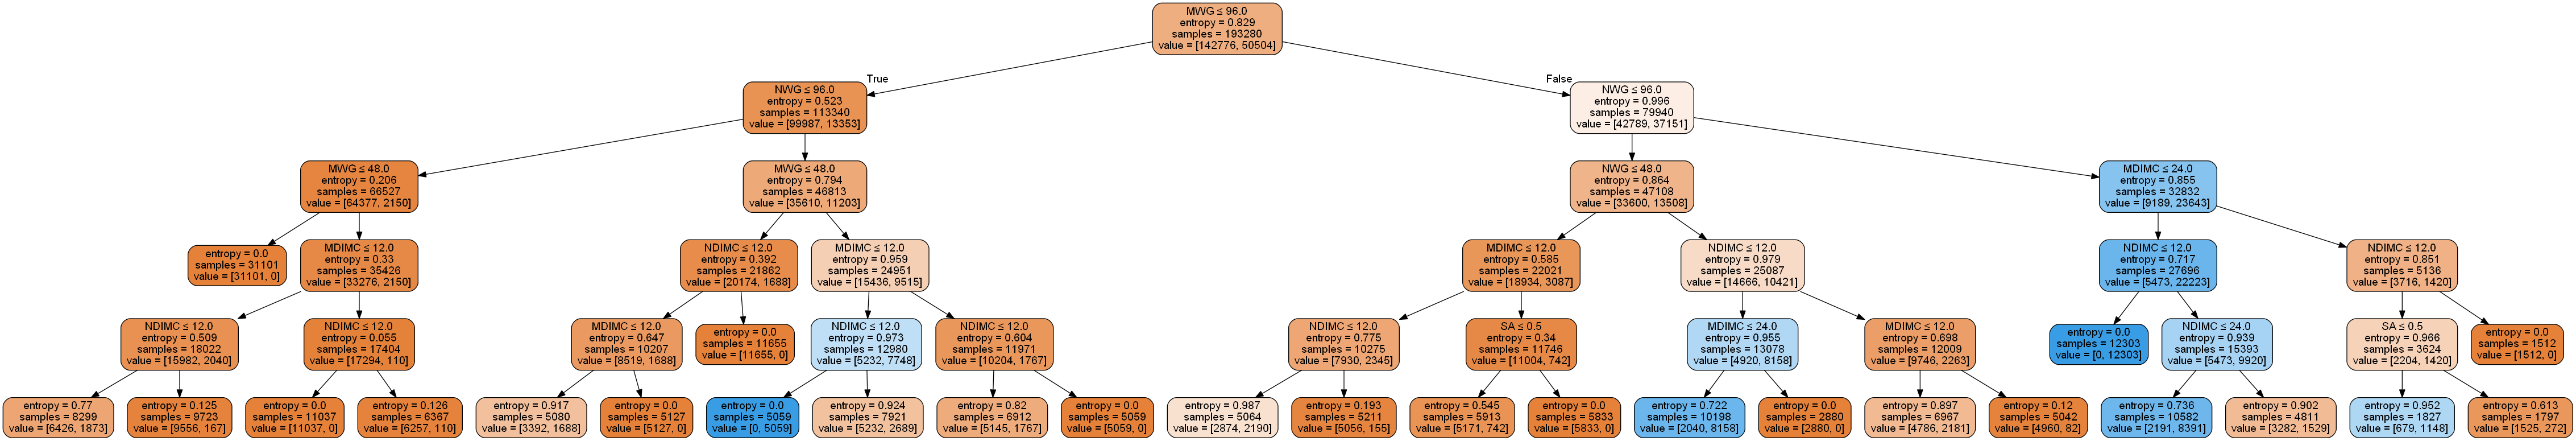

In [75]:
from IPython.display import display, Image
import pydotplus
from sklearn import tree
from sklearn.tree import _tree
from sklearn import tree
import collections
import drawtree
import os  

#os.environ["PATH"] += os.pathsep + 'C:\\Users\\User\\.conda\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'

dot_data = tree.export_graphviz(clf_entropy, out_file = 'thisIsTheImagetree.dot',
                                 feature_names=features, filled   = True
                                    , rounded  = True
                                    , special_characters = True)

graph = pydotplus.graph_from_dot_file('thisIsTheImagetree.dot')  

thisIsTheImage = Image(graph.create_png())
display(thisIsTheImage)
#print(dt.tree_.feature)


In [ ]:
##Find the best parameter for pruning

In [137]:
max_depth=20
test_error=[]
train_error=[]
test_accuracy=[]
train_accuracy=[]
for i in range(1,max_depth+1):
    clf_entropy = tarin_using_entropy(X_train_80, y_train_80,max_depth=i)  
    print("Results Using Entropy:") 
    # Prediction using test 
    print("prediction using test for depth="+str(i))
    y_pred_test = prediction(X_test, clf_entropy) 
    test_accuracy.append(cal_accuracy(y_test, y_pred_test))
    test_error.append(compute_error(y_test, y_pred_test)*100)
    
    #prediction using Train
    print("prediction using Train for depth="+str(i))
    y_pred_train = prediction(X_train_80, clf_entropy) 
    train_accuracy.append(cal_accuracy(y_train_80, y_pred_train))
    train_error.append(compute_error(y_train_80, y_pred_train)*100)
    print(" ")
    

Results Using Entropy:
prediction using test for depth=1
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[35677     0]
 [12643     0]]
Accuracy :  73.83485099337749


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Report :                precision    recall  f1-score   support

           0       0.74      1.00      0.85     35677
           1       0.00      0.00      0.00     12643

    accuracy                           0.74     48320
   macro avg       0.37      0.50      0.42     48320
weighted avg       0.55      0.74      0.63     48320

prediction using Train for depth=1
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[142776      0]
 [ 50504      0]]
Accuracy :  73.87003311258277


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Report :                precision    recall  f1-score   support

           0       0.74      1.00      0.85    142776
           1       0.00      0.00      0.00     50504

    accuracy                           0.74    193280
   macro avg       0.37      0.50      0.42    193280
weighted avg       0.55      0.74      0.63    193280

 
Results Using Entropy:
prediction using test for depth=2
Predicted values:
[0 0 0 ... 0 1 0]
Confusion Matrix:  [[33262  2415]
 [ 6642  6001]]
Accuracy :  81.25620860927152
Report :                precision    recall  f1-score   support

           0       0.83      0.93      0.88     35677
           1       0.71      0.47      0.57     12643

    accuracy                           0.81     48320
   macro avg       0.77      0.70      0.73     48320
weighted avg       0.80      0.81      0.80     48320

prediction using Train for depth=2
Predicted values:
[1 0 0 ... 1 1 0]
Confusion Matrix:  [[133587   9189]
 [ 26861  23643]]
Accuracy :  81.34830298013

Results Using Entropy:
prediction using test for depth=10
Predicted values:
[0 0 1 ... 0 1 0]
Confusion Matrix:  [[35100   577]
 [  742 11901]]
Accuracy :  97.27028145695364
Report :                precision    recall  f1-score   support

           0       0.98      0.98      0.98     35677
           1       0.95      0.94      0.95     12643

    accuracy                           0.97     48320
   macro avg       0.97      0.96      0.96     48320
weighted avg       0.97      0.97      0.97     48320

prediction using Train for depth=10
Predicted values:
[1 0 0 ... 1 1 0]
Confusion Matrix:  [[140420   2356]
 [  2942  47562]]
Accuracy :  97.25889900662251
Report :                precision    recall  f1-score   support

           0       0.98      0.98      0.98    142776
           1       0.95      0.94      0.95     50504

    accuracy                           0.97    193280
   macro avg       0.97      0.96      0.96    193280
weighted avg       0.97      0.97      0.97    1932

Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     35677
           1       0.99      0.99      0.99     12643

    accuracy                           0.99     48320
   macro avg       0.99      0.99      0.99     48320
weighted avg       0.99      0.99      0.99     48320

prediction using Train for depth=18
Predicted values:
[1 0 0 ... 1 1 0]
Confusion Matrix:  [[142460    316]
 [   405  50099]]
Accuracy :  99.62696605960265
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00    142776
           1       0.99      0.99      0.99     50504

    accuracy                           1.00    193280
   macro avg       1.00      0.99      1.00    193280
weighted avg       1.00      1.00      1.00    193280

 
Results Using Entropy:
prediction using test for depth=19
Predicted values:
[0 0 1 ... 0 1 0]
Confusion Matrix:  [[35537   140]
 [  157 12486]]
Accuracy :  99.385347682

Text(0.5, 1.0, 'Test & Train Accuracy')

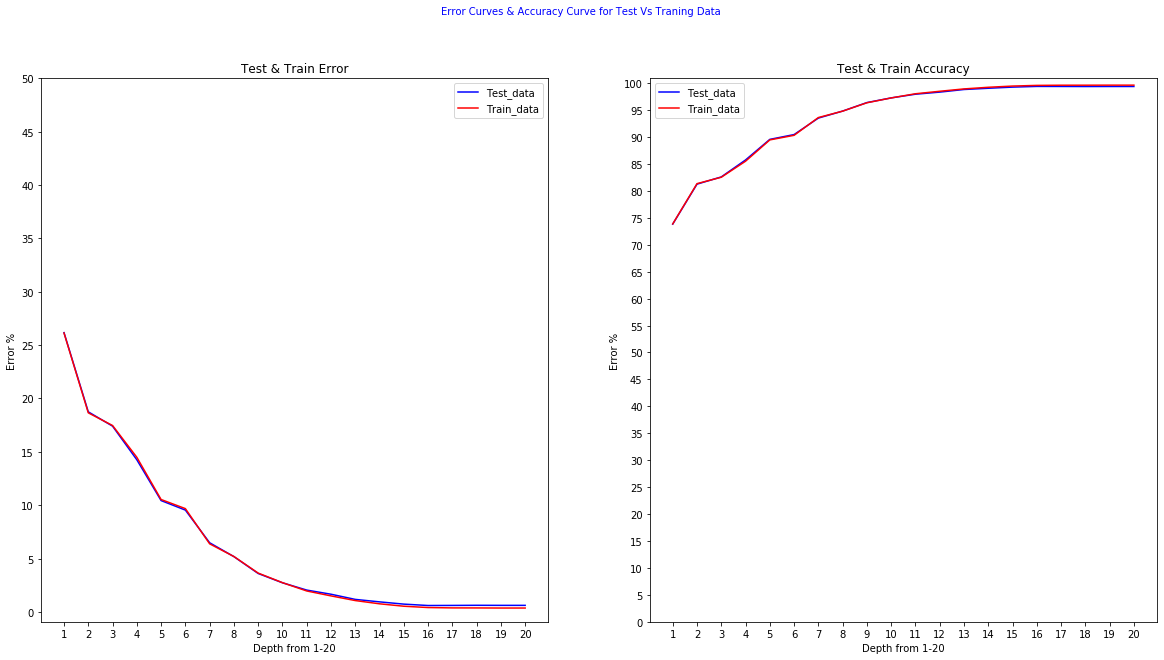

In [138]:
x=np.arange(1,max_depth+1,1)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axes[0].plot(x,test_error,color='blue',label='Test_data')
axes[0].plot(x,train_error,color='red',label='Train_data')

axes[1].plot(x,test_accuracy,color='blue',label='Test_data')
axes[1].plot(x,train_accuracy,color='red',label='Train_data')

fig.suptitle('Error Curves & Accuracy Curve for Test Vs Traning Data',fontsize=10,color='Blue')
axes[0].legend()
axes[0].set_xticks(x)
axes[0].set_yticks(np.arange(0,55,5))
axes[0].set_xlabel('Depth from 1-20' )
axes[0].set_ylabel('Error %')
axes[0].set_title('Test & Train Error')
axes[1].legend()
axes[1].set_xticks(x)
axes[1].set_yticks(np.arange(0,105,5))
axes[1].set_xlabel('Depth from 1-20' )
axes[1].set_ylabel('Error %')
axes[1].set_title('Test & Train Accuracy')

In [ ]:
#Entropy Metric

In [9]:
clf_entropy = tarin_using_entropy(X_train, y_train,6)  

print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy_test = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy_test)
print("Test Error",compute_error(y_test, y_pred_entropy_test)*100)

y_pred_entropy_val = prediction(X_val, clf_entropy) 
cal_accuracy(y_val, y_pred_entropy_val)
print("Validation Error",compute_error(y_val, y_pred_entropy_val)*100)


y_pred_entropy_train = prediction(X_train, clf_entropy) 
cal_accuracy(y_train, y_pred_entropy_train)
print("Train Error",compute_error(y_train, y_pred_entropy_train)*100)


Results Using Entropy:
Predicted values:
[0 0 1 ... 0 0 0]
Confusion Matrix:  [[14211   565]
 [ 1388  3836]]
Accuracy :  90.235
Report :                precision    recall  f1-score   support

           0       0.91      0.96      0.94     14776
           1       0.87      0.73      0.80      5224

    accuracy                           0.90     20000
   macro avg       0.89      0.85      0.87     20000
weighted avg       0.90      0.90      0.90     20000

Test Error 9.765
Predicted values:
[0 0 0 ... 1 0 0]
Confusion Matrix:  [[11314   491]
 [ 1076  3119]]
Accuracy :  90.20625
Report :                precision    recall  f1-score   support

           0       0.91      0.96      0.94     11805
           1       0.86      0.74      0.80      4195

    accuracy                           0.90     16000
   macro avg       0.89      0.85      0.87     16000
weighted avg       0.90      0.90      0.90     16000

Validation Error 9.79375
Predicted values:
[0 0 0 ... 0 0 1]
Confusion Mat

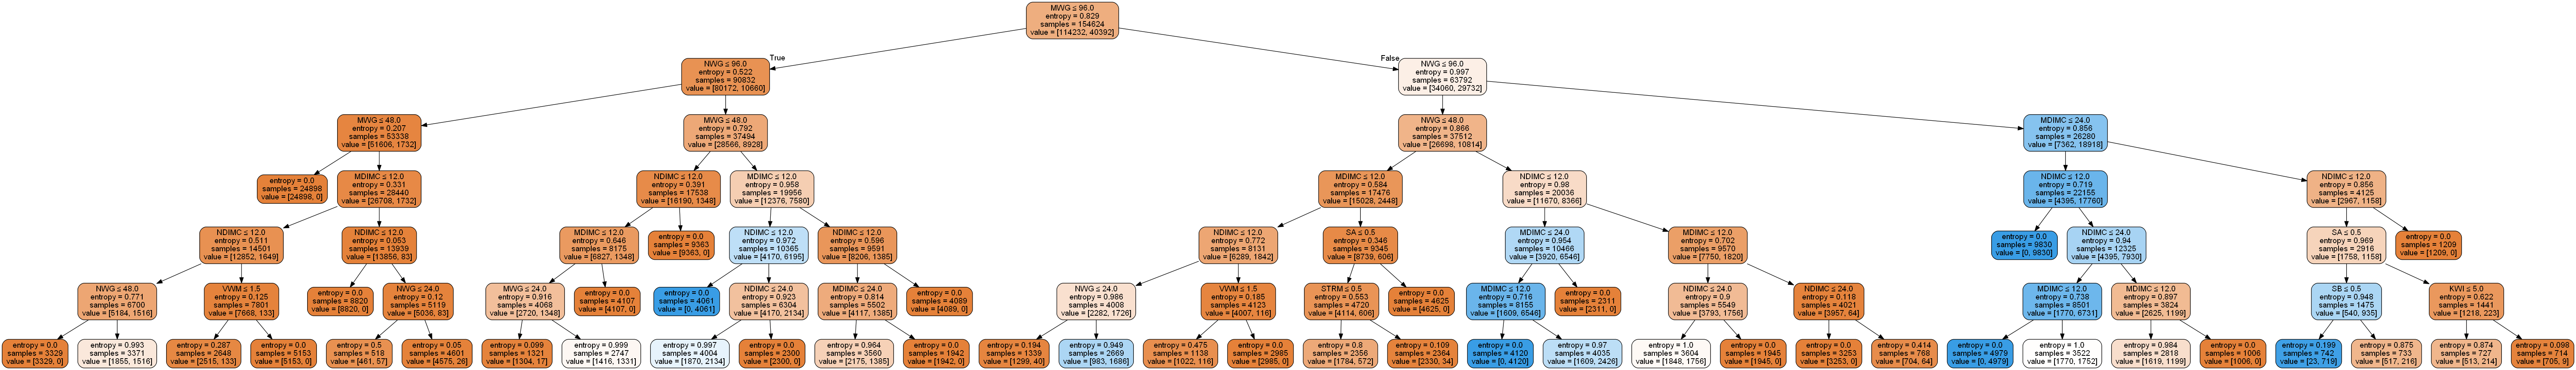

In [146]:
from IPython.display import display, Image
import pydotplus
from sklearn import tree
from sklearn.tree import _tree
from sklearn import tree
import collections
import drawtree
import os  

#os.environ["PATH"] += os.pathsep + 'C:\\Users\\User\\.conda\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'

dot_data = tree.export_graphviz(clf_entropy, out_file = 'thisIsTheImagetree.dot',
                                 feature_names=features, filled   = True
                                    , rounded  = True
                                    , special_characters = True)

graph = pydotplus.graph_from_dot_file('thisIsTheImagetree.dot')  

thisIsTheImage = Image(graph.create_png())
display(thisIsTheImage)
#print(dt.tree_.feature)

In [ ]:
##Gini Index Metric

In [18]:
clf_gini = tarin_using_entropy(X_train, y_train,6)  

print("Results Using Gini:") 
# Prediction using entropy 
y_pred_gini_test = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini_test)
print("Test Error",compute_error(y_test, y_pred_gini_test)*100)

y_pred_gini_val = prediction(X_val, clf_gini) 
cal_accuracy(y_val, y_pred_gini_val)
print("Validation Error",compute_error(y_val, y_pred_gini_val)*100)

# Prediction using entropy 
y_pred_gini_train = prediction(X_train, clf_gini) 
cal_accuracy(y_train, y_pred_gini_train)
print("Train Error",compute_error(y_train, y_pred_gini_train)*100)


Results Using Gini:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[14179   578]
 [ 1317  3926]]
Accuracy :  90.525
Report :                precision    recall  f1-score   support

           0       0.92      0.96      0.94     14757
           1       0.87      0.75      0.81      5243

    accuracy                           0.91     20000
   macro avg       0.89      0.85      0.87     20000
weighted avg       0.90      0.91      0.90     20000

Test Error 9.475
Predicted values:
[1 0 1 ... 0 0 0]
Confusion Matrix:  [[11308   488]
 [ 1077  3127]]
Accuracy :  90.21875
Report :                precision    recall  f1-score   support

           0       0.91      0.96      0.94     11796
           1       0.87      0.74      0.80      4204

    accuracy                           0.90     16000
   macro avg       0.89      0.85      0.87     16000
weighted avg       0.90      0.90      0.90     16000

Validation Error 9.78125
Predicted values:
[0 0 0 ... 0 0 1]
Confusion Matrix

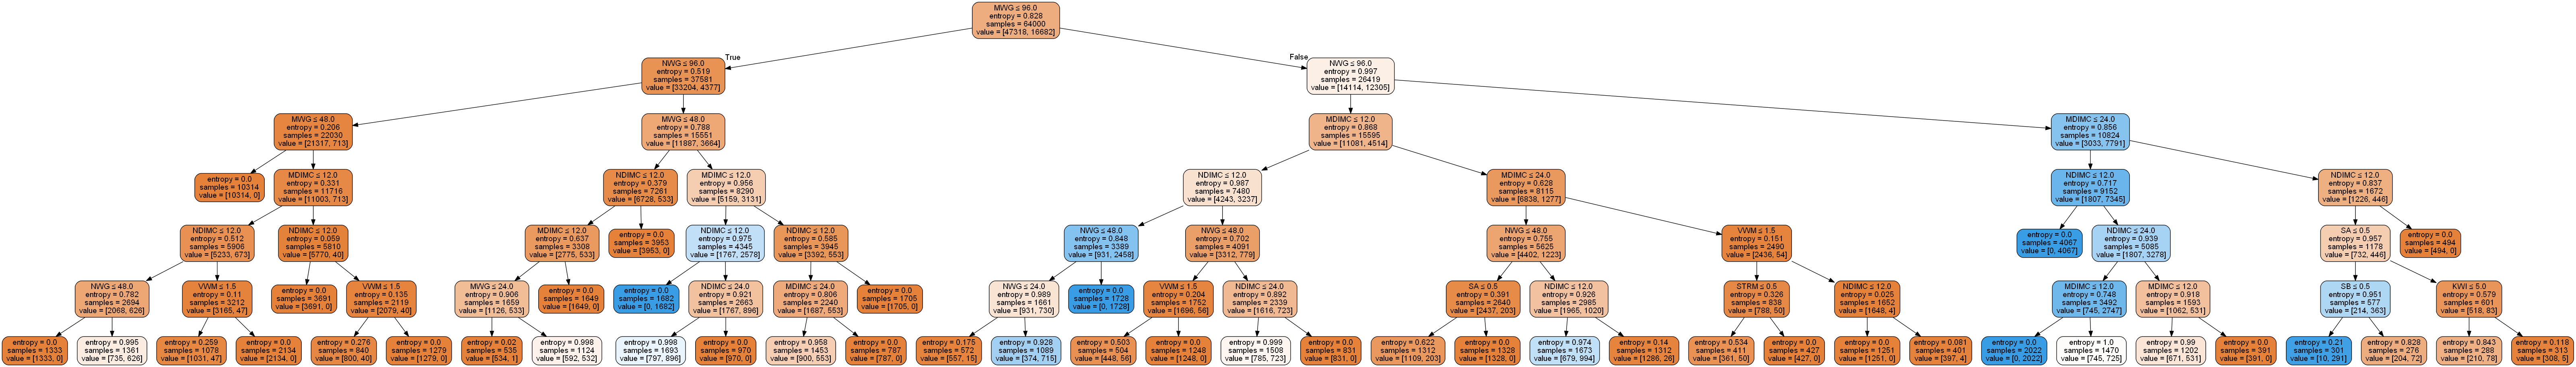

In [13]:
from IPython.display import display, Image
import pydotplus
from sklearn import tree
from sklearn.tree import _tree
from sklearn import tree
import collections
import drawtree
import os  

#os.environ["PATH"] += os.pathsep + 'C:\\Users\\User\\.conda\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'

dot_data = tree.export_graphviz(clf_gini, out_file = 'thisIsTheImagetree.dot',
                                 feature_names=features, filled   = True
                                    , rounded  = True
                                    , special_characters = True)

graph = pydotplus.graph_from_dot_file('thisIsTheImagetree.dot')  

thisIsTheImage = Image(graph.create_png())
display(thisIsTheImage)
#print(dt.tree_.feature)